# Task 4 Insurance Charges Regression

## Introduction
Predicting insurance charges using linear regression with evaluation metrics.

In [1]:
# Load libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

## Load and inspect the dataset

In [2]:
# Example loading code
df = pd.read_csv('/content/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# Basic info
print("Shape:", df.shape)
print("\nColumns:", df.columns)
print("\nMissing values:\n", df.isnull().sum())


Shape: (1338, 7)

Columns: Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

Missing values:
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [4]:
# One-hot encode categorical columns (sex, smoker, region)
df_encoded = pd.get_dummies(df, drop_first=True)


## Data Visualization / EDA

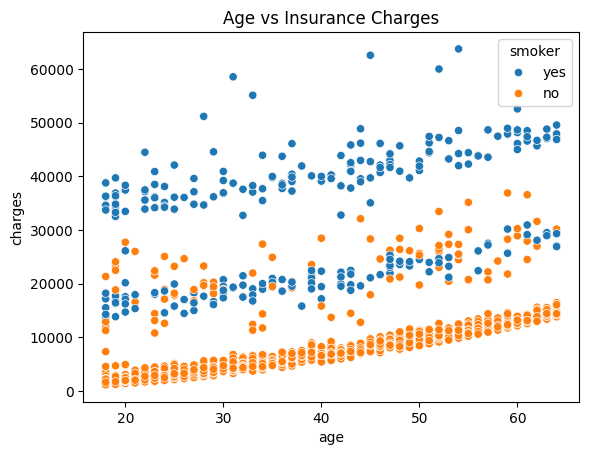

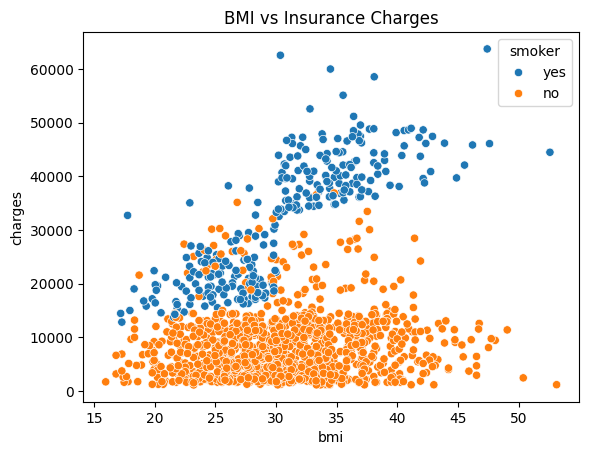

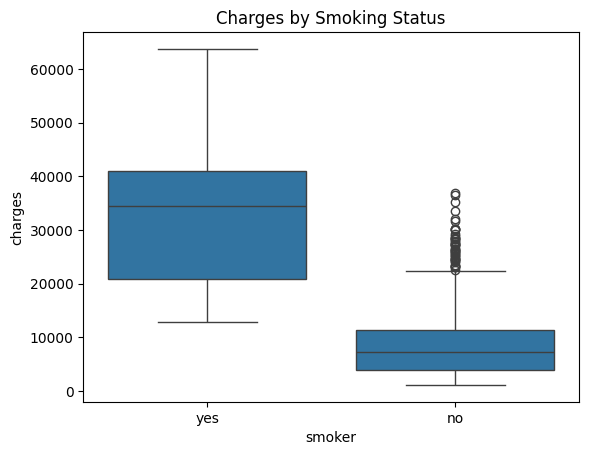

In [5]:
# Age vs Charges
sns.scatterplot(x='age', y='charges', data=df, hue='smoker')
plt.title("Age vs Insurance Charges")
plt.show()

# BMI vs Charges
sns.scatterplot(x='bmi', y='charges', data=df, hue='smoker')
plt.title("BMI vs Insurance Charges")
plt.show()

# Boxplot of charges by smoking status
sns.boxplot(x='smoker', y='charges', data=df)
plt.title("Charges by Smoking Status")
plt.show()


## Model Training & Evaluation

In [6]:
# Features and target
X = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


Mean Absolute Error (MAE): 4181.19
Root Mean Squared Error (RMSE): 5796.28


## Conclusion
In this task, we trained a Linear Regression model to estimate insurance charges based on features like age, BMI, and smoking status:

Visual analysis showed that smokers and individuals with higher age or BMI tend to have higher medical costs.

The model achieved a reasonably good fit, with:

MAE (Mean Absolute Error) indicating the average prediction error,

RMSE (Root Mean Squared Error) reflecting the spread of those errors.

This analysis can help insurers and individuals estimate medical costs and plan accordingly.